# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzašším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **survived**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

train_set = pd.read_csv('data.csv')

train_set.head()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


## Data Dictionary

| Variable   | Definition                          | Key                                        |
|------------|------------------------------------|--------------------------------------------|
| survival   | Survival                            | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                                |                                            |
| Age        | Age in years                        |                                            |
| sibsp      | # of siblings / spouses aboard the Titanic |                                        |
| parch      | # of parents / children aboard the Titanic |                                    |
| ticket     | Ticket number                       |                                            |
| fare       | Passenger fare                      |                                            |
| cabin      | Cabin number                        |                                            |
| embarked   | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |
|            |                                    |                                            |

These are the variables and their definitions for the dataset.
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

![convert notebook to web app](https://www.titanicstory.com/cutaway.gif)

![convert notebook to web app](https://i.pinimg.com/736x/68/6b/ee/686bee12fbeaa345afdeec6097eb993a.jpg)

![convert notebook to web app](https://www.simscale.com/wp-content/uploads/2017/12/titanicBreakupReconstruction.jpg)

In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


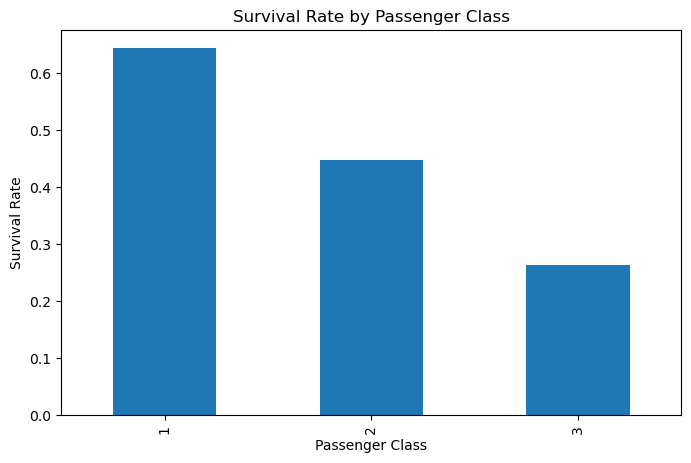

In [3]:
plt.figure(figsize=(8, 5))
train_set.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [4]:
train_set[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.644000
1,2,0.448113
2,3,0.263941


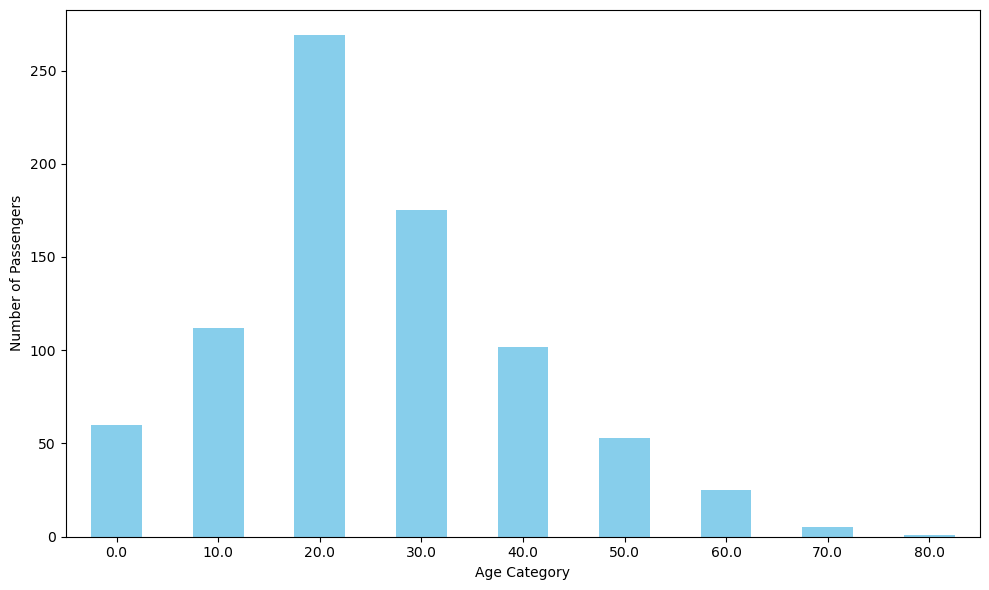

In [5]:
plt.figure(figsize=(10, 6))
train_set['age'].apply(lambda age: (age // 10) * 10).value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/Users/artemfadeev/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


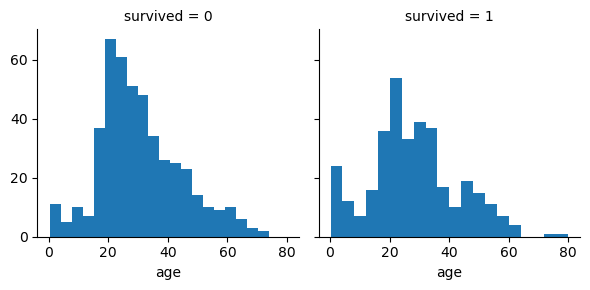

In [6]:
g = sns.FacetGrid(train_set, col='survived')
g.map(plt.hist, 'age', bins=20)

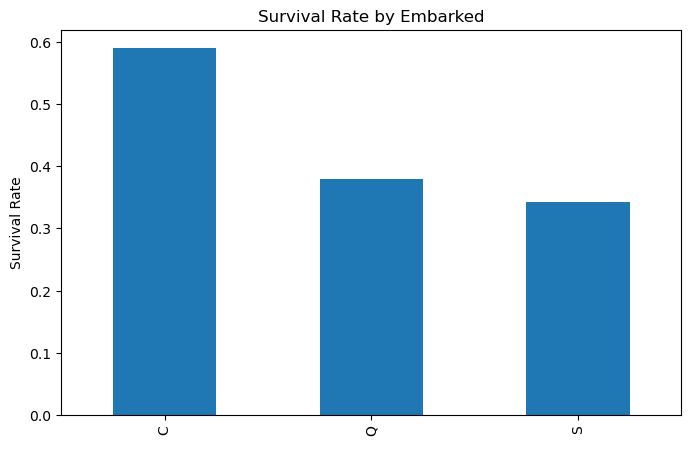

In [7]:
plt.figure(figsize=(8, 5))
train_set.groupby('embarked')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Embarked')
plt.xlabel(' ')
plt.ylabel('Survival Rate')
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/TitanicRoute.svg/2560px-TitanicRoute.svg.png)

Text(0.5, 0.98, '')

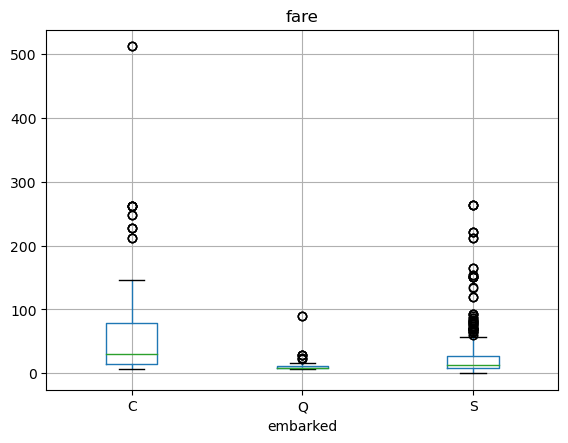

In [8]:
ax = train_set.boxplot(by='embarked', column='fare')
ax.set_xlabel('embarked')
ax.set_ylabel('')
plt.suptitle('')

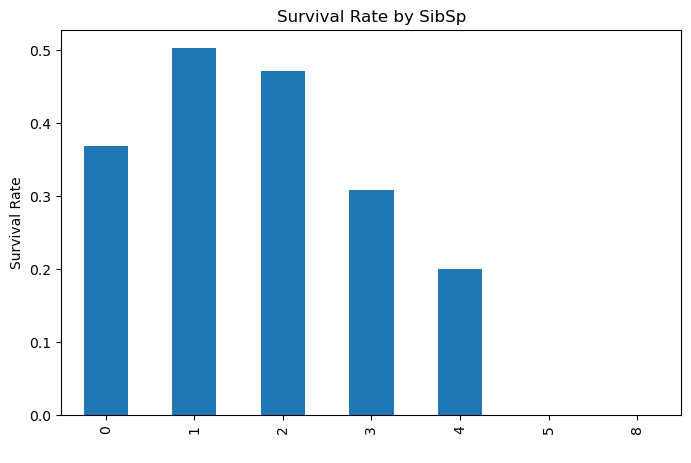

In [9]:
plt.figure(figsize=(8, 5))
train_set.groupby('sibsp')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by SibSp')
plt.xlabel(' ')
plt.ylabel('Survival Rate')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split, ParameterGrid

y = train_set['survived']

X  = train_set.drop(["survived", 'ID'], axis=1).copy()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42) 

In [11]:
def preprocess_data(df):
    # Function to extract the title from the 'Name' column
    def extract_title(name):
        title_match = re.search(r' ([A-Za-z]+)\.', name)
        if title_match:
            return title_match.group(1)
        return None

    # Add new 'Title' column
    df['Title'] = df['name'].apply(extract_title)

    # Replace various titles with 'Rare' or other common titles
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Calculate average age for each title
    av_age_Mr = int(round(df[df['Title'] == 'Mr']['age'].mean()))
    av_age_Mrs = int(round(df[df['Title'] == 'Mrs']['age'].mean()))
    av_age_Miss = int(round(df[df['Title'] == 'Miss']['age'].mean()))
    av_age_Master = int(round(df[df['Title'] == 'Master']['age'].mean()))
    av_age_Rare = int(round(df[df['Title'] == 'Rare']['age'].mean()))

    # Function to fill missing age based on title
    def fill_age_based_on_title(passenger):
        title = passenger['Title']
        age = passenger['age']

        if pd.isna(age):  # Check if age is missing
            if title == 'Mr':
                return av_age_Mr
            elif title == 'Mrs':
                return av_age_Mrs
            elif title == 'Miss':
                return av_age_Miss
            elif title == 'Master':
                return av_age_Master
            elif title == 'Rare':
                return av_age_Rare
        else:
            return age

    # Apply fill_age_based_on_title function
    df['age'] = df.apply(fill_age_based_on_title, axis=1)

    # Additional preprocessing steps
    df['relatives'] = df['sibsp'] + df['parch']
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['FareBand'] = pd.qcut(df['fare'], 4)
    df['gender_code'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['title_code'] = df['Title'].apply(lambda x: 1 if x in ['Mr', 'Mrs'] else (2 if x in ['Miss', 'Master'] else 0))
    df['embarked'] = df['embarked'].apply(lambda x: 1 if x=='C' else (2 if x=='Q' else 0))
    fare_bands = df['FareBand'].unique().categories
    for idx, band in enumerate(fare_bands):
        df.loc[df['FareBand'] == band, 'fare'] = idx
    df['fare'] = df['fare'].astype(int)
    df.drop(['FareBand', 'cabin', 'ticket', 'home.dest', 'Title', 'sex', 'name'], axis=1, inplace=True)
    df['age'] = df['age'].astype(int)

    return df

Xtrain = preprocess_data(Xtrain)
Xtest = preprocess_data(Xtest)

In [12]:
from sklearn.model_selection import cross_val_score

# Seeking the best hyperparameters for Decision Tree Classifier
param_grid = {
    'max_depth': range(1, 9),
    'criterion': ['gini', 'entropy']
}

param_comb = ParameterGrid(param_grid)

val_metric = []

for params in param_comb:
    clf = DecisionTreeClassifier(**params, random_state = 42)
    # cross validation
    fold_acc = cross_val_score(clf, Xtrain, ytrain, cv=5)
    val_metric.append(np.mean(fold_acc))
    
best_tree_params = param_comb[np.argmax(val_metric)]
best_tree_metric = max(val_metric)
print(f"The best hyperparameters for DT {best_tree_params} with cross-validation accuracy {best_tree_metric:.4f}.")

clfDT = DecisionTreeClassifier(max_depth=best_tree_params['max_depth'], criterion=best_tree_params['criterion'], random_state=42)

The best hyperparameters for DT {'max_depth': 4, 'criterion': 'entropy'} with cross-validation accuracy 0.7817.


In [13]:
# Seeking the best hyperparameters for K-Nearest Neighbour 

param_grid = {
    'n_neighbors': range(1, 15)
}

param_comb = ParameterGrid(param_grid)

val_metric = []

for params in param_comb:
    clf = KNeighborsClassifier(**params)
    # cross validation
    fold_acc = cross_val_score(clf, Xtrain, ytrain, cv=5)
    val_metric.append(np.mean(fold_acc))
    
best_knn_params = param_comb[np.argmax(val_metric)]
best_knn_metric = max(val_metric)
print(f"The best hyperparameters for KNN {best_knn_params} with cross-validation accuracy {best_knn_metric:.4f}.")

clfKNN = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'])

The best hyperparameters for KNN {'n_neighbors': 13} with cross-validation accuracy 0.7167.


In [14]:
print("The best DT", best_tree_metric)
print("The best KNN", best_knn_metric)


print("\nThe best model is DT")

dtc_model = DecisionTreeClassifier(**best_tree_params, random_state = 42)
dtc_model.fit(Xtrain,ytrain)

print('Accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dtc_model.predict(Xtest))))

The best DT 0.7816666666666667
The best KNN 0.7166666666666666

The best model is DT
Accuracy score (test): 0.805000


In [15]:
from sklearn.metrics import f1_score

y_pred = dtc_model.predict(Xtest)

f1 = f1_score(ytest, y_pred)

print(f"f1 score for Decision Tree Classifier = {f1}")

f1 score for Decision Tree Classifier = 0.7045454545454547


In [16]:
knn_model = KNeighborsClassifier(**best_knn_params)
knn_model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=13)

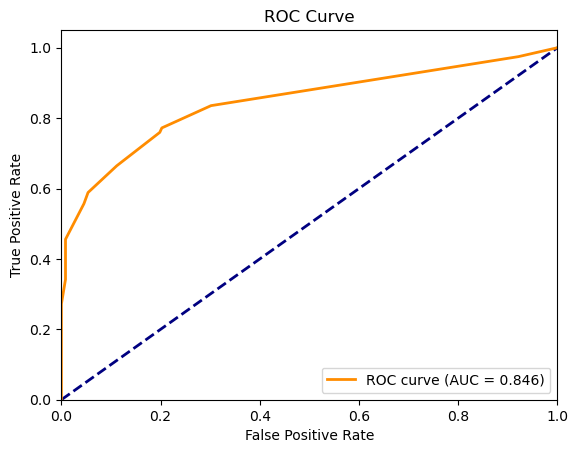

In [17]:
y_pred_proba = dtc_model.predict_proba(Xtest)

fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba[:,1])

AUC = metrics.auc(fpr, tpr)

plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr, tpr, color="darkorange", lw=2, label = f"ROC curve (AUC = {AUC:.3f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

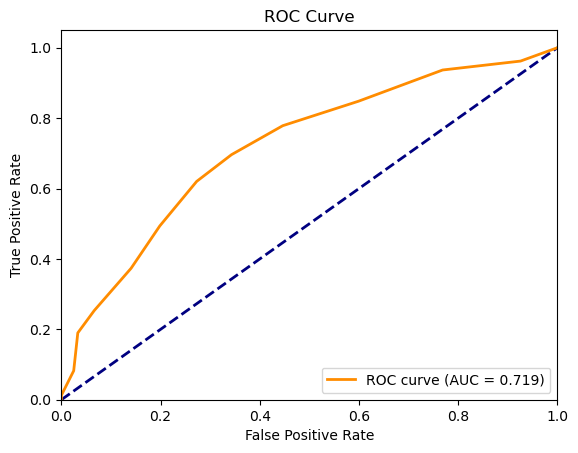

In [18]:
y_pred_proba = knn_model.predict_proba(Xtest)

fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba[:,1])

AUC = metrics.auc(fpr, tpr)

plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr, tpr, color="darkorange", lw=2, label = f"ROC curve (AUC = {AUC:.3f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [19]:
evaluation = pd.read_csv('evaluation.csv')

In [20]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        244 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      62 non-null     object 
 10  embarked   309 non-null    object 
 11  home.dest  179 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


In [21]:
evaluation = preprocess_data(evaluation)

In [22]:
evaluation_pred = evaluation.drop('ID', axis=1).copy()

Y_pred = dtc_model.predict(evaluation_pred)


submission = pd.DataFrame({
        "ID": (evaluation["ID"]),
        "Survived": Y_pred
    })

submission.to_csv('results.csv', index=False)